
## CA-Classer: An efficient Cancer classifier using different ML algorithms

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset =  pd.read_csv('Cancer_Data.csv')

In [ ]:
print("Keys of iris_dataset:\n", dataset.keys())

Keys of iris_dataset:
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
accuracy={}

In [ ]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


#### Knowing Your Task and Knowing Your Data

In [ ]:
dataset.shape

(569, 33)

In [ ]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Duplicates

In [ ]:
duplicate = dataset[dataset.duplicated()]
print("Duplicate Rows : ",len(duplicate))
duplicate

Duplicate Rows :  0


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


# Removing Duplicates

In [ ]:
dataset.drop_duplicates(inplace = True)
duplicate = dataset[dataset.duplicated()]
print("Duplicate Rows : ", len(duplicate))

Duplicate Rows :  0


# Removing Null Values

In [ ]:
dataset = dataset.drop(['Unnamed: 32'], axis = 1)  #bacause of null value

# Removing Unnecessary data

In [ ]:
dataset=dataset.drop(labels="id", axis=1)   #id's have no importance on training data

In [ ]:
dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Encoding categorical values

In [ ]:

dataset['diagnosis'] = dataset['diagnosis'].map({'M':0,'B':1})
dataset['diagnosis']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
X=dataset.drop('diagnosis',axis=1)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
Y=dataset['diagnosis']
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
DATA SPLITING


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)
print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


# Bar Diagram

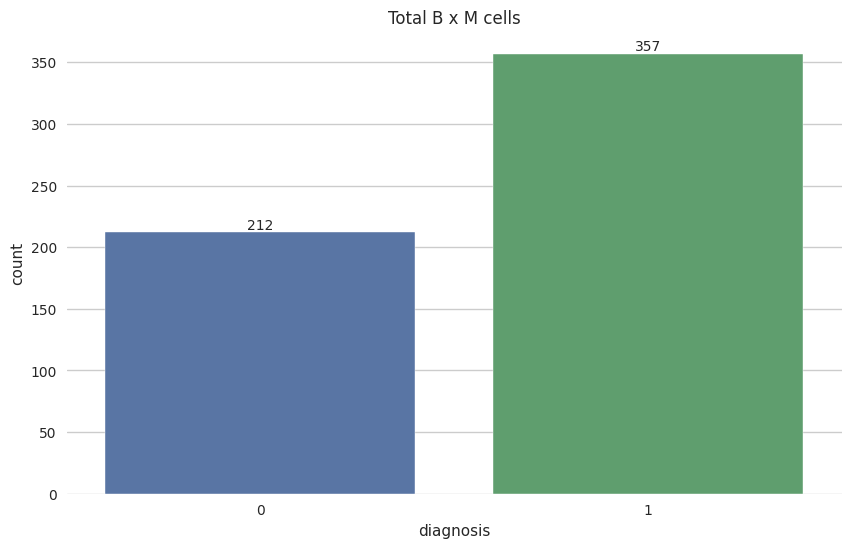

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
ax = sns.countplot(data=dataset, x='diagnosis')
plt.title('Total B x M cells')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

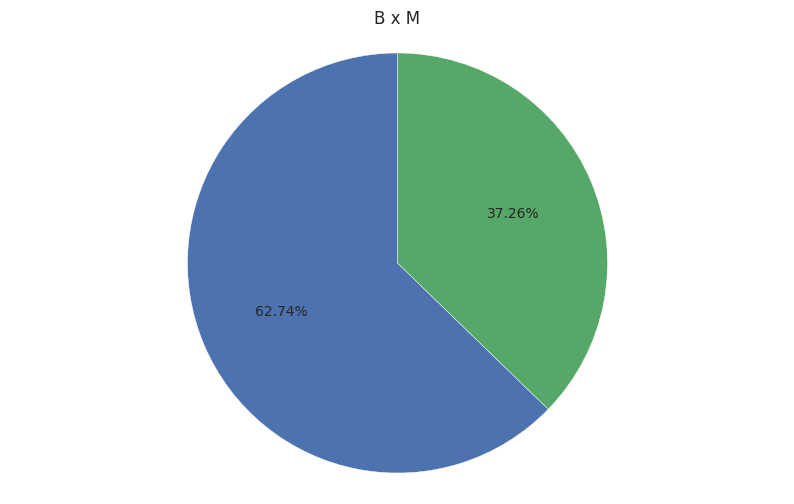

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plt.pie(dataset['diagnosis'].value_counts(),autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title("B x M")
plt.show()

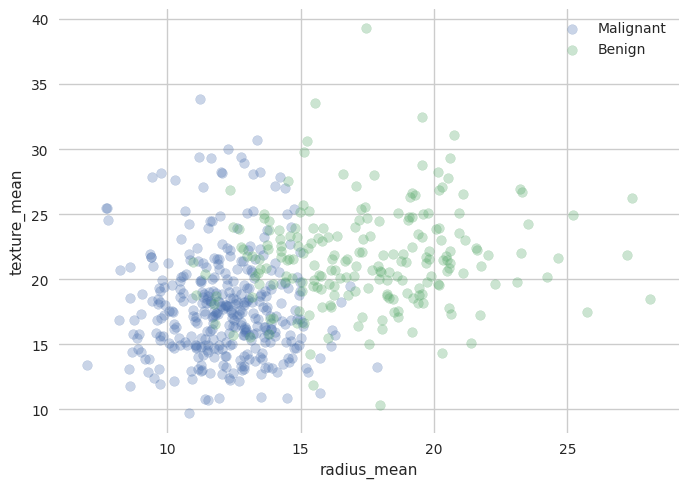

In [ ]:
M = dataset[dataset.diagnosis == 1] #Diagnosis transfers all values of M to M data
B = dataset[dataset.diagnosis == 0] #Diagnosis transfers all values of B to B data

plt.scatter(M.radius_mean,M.texture_mean, label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean,B.texture_mean,label = "Benign", alpha = 0.3)

plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

plt.legend()
plt.show()

In [ ]:
class_0 = dataset[dataset['diagnosis'] == 0]
class_1 = dataset[dataset['diagnosis'] == 1]

# Oversampling

In [ ]:
class_1_over = class_1.sample(len(class_0), replace=True)
dataset= pd.concat([class_1_over, class_0], axis=0)
#title='Label Distribution after Oversampling')

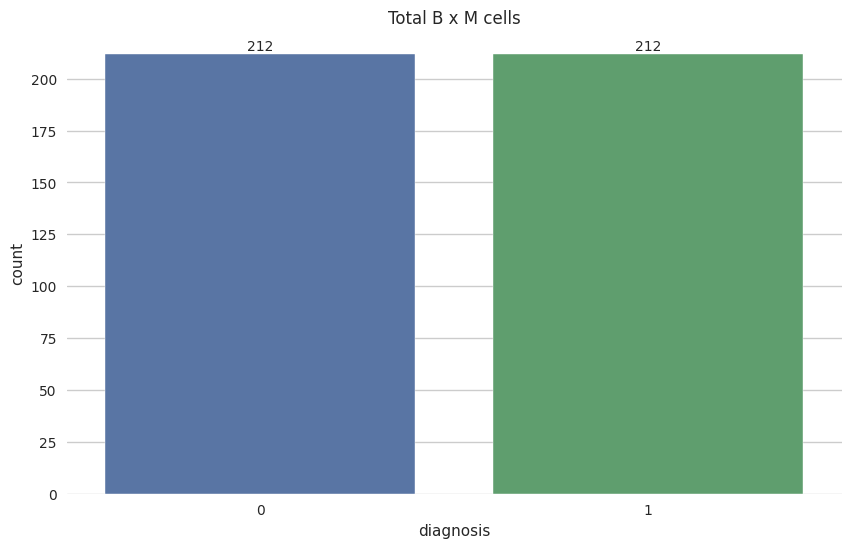

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
ax = sns.countplot(data=dataset, x='diagnosis')
plt.title('Total B x M cells')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

# Pie Diagram

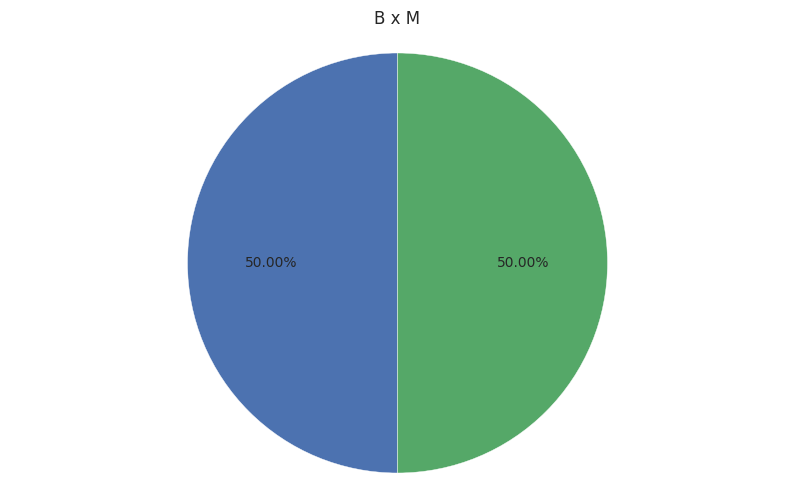

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plt.pie(dataset['diagnosis'].value_counts(),autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title("B x M")
plt.show()

# Scatter Diagram

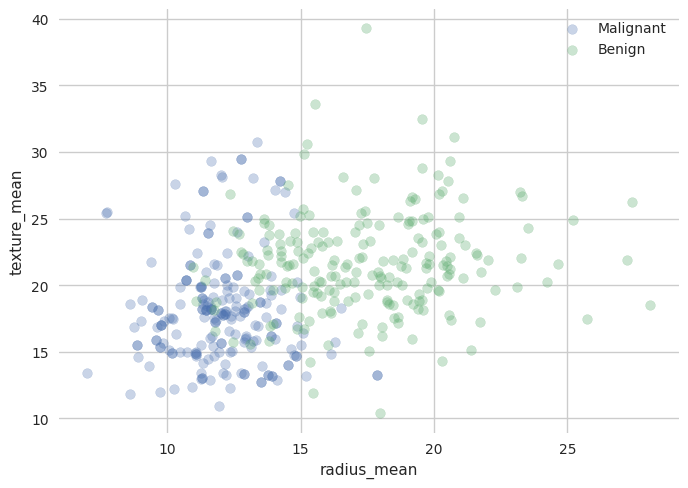

In [ ]:
M = dataset[dataset.diagnosis == 1] #Diagnosis transfers all values of M to M data
B = dataset[dataset.diagnosis == 0] #Diagnosis transfers all values of B to B data

plt.scatter(M.radius_mean,M.texture_mean, label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean,B.texture_mean,label = "Benign", alpha = 0.3)

plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

plt.legend()
plt.show()

# Heat map

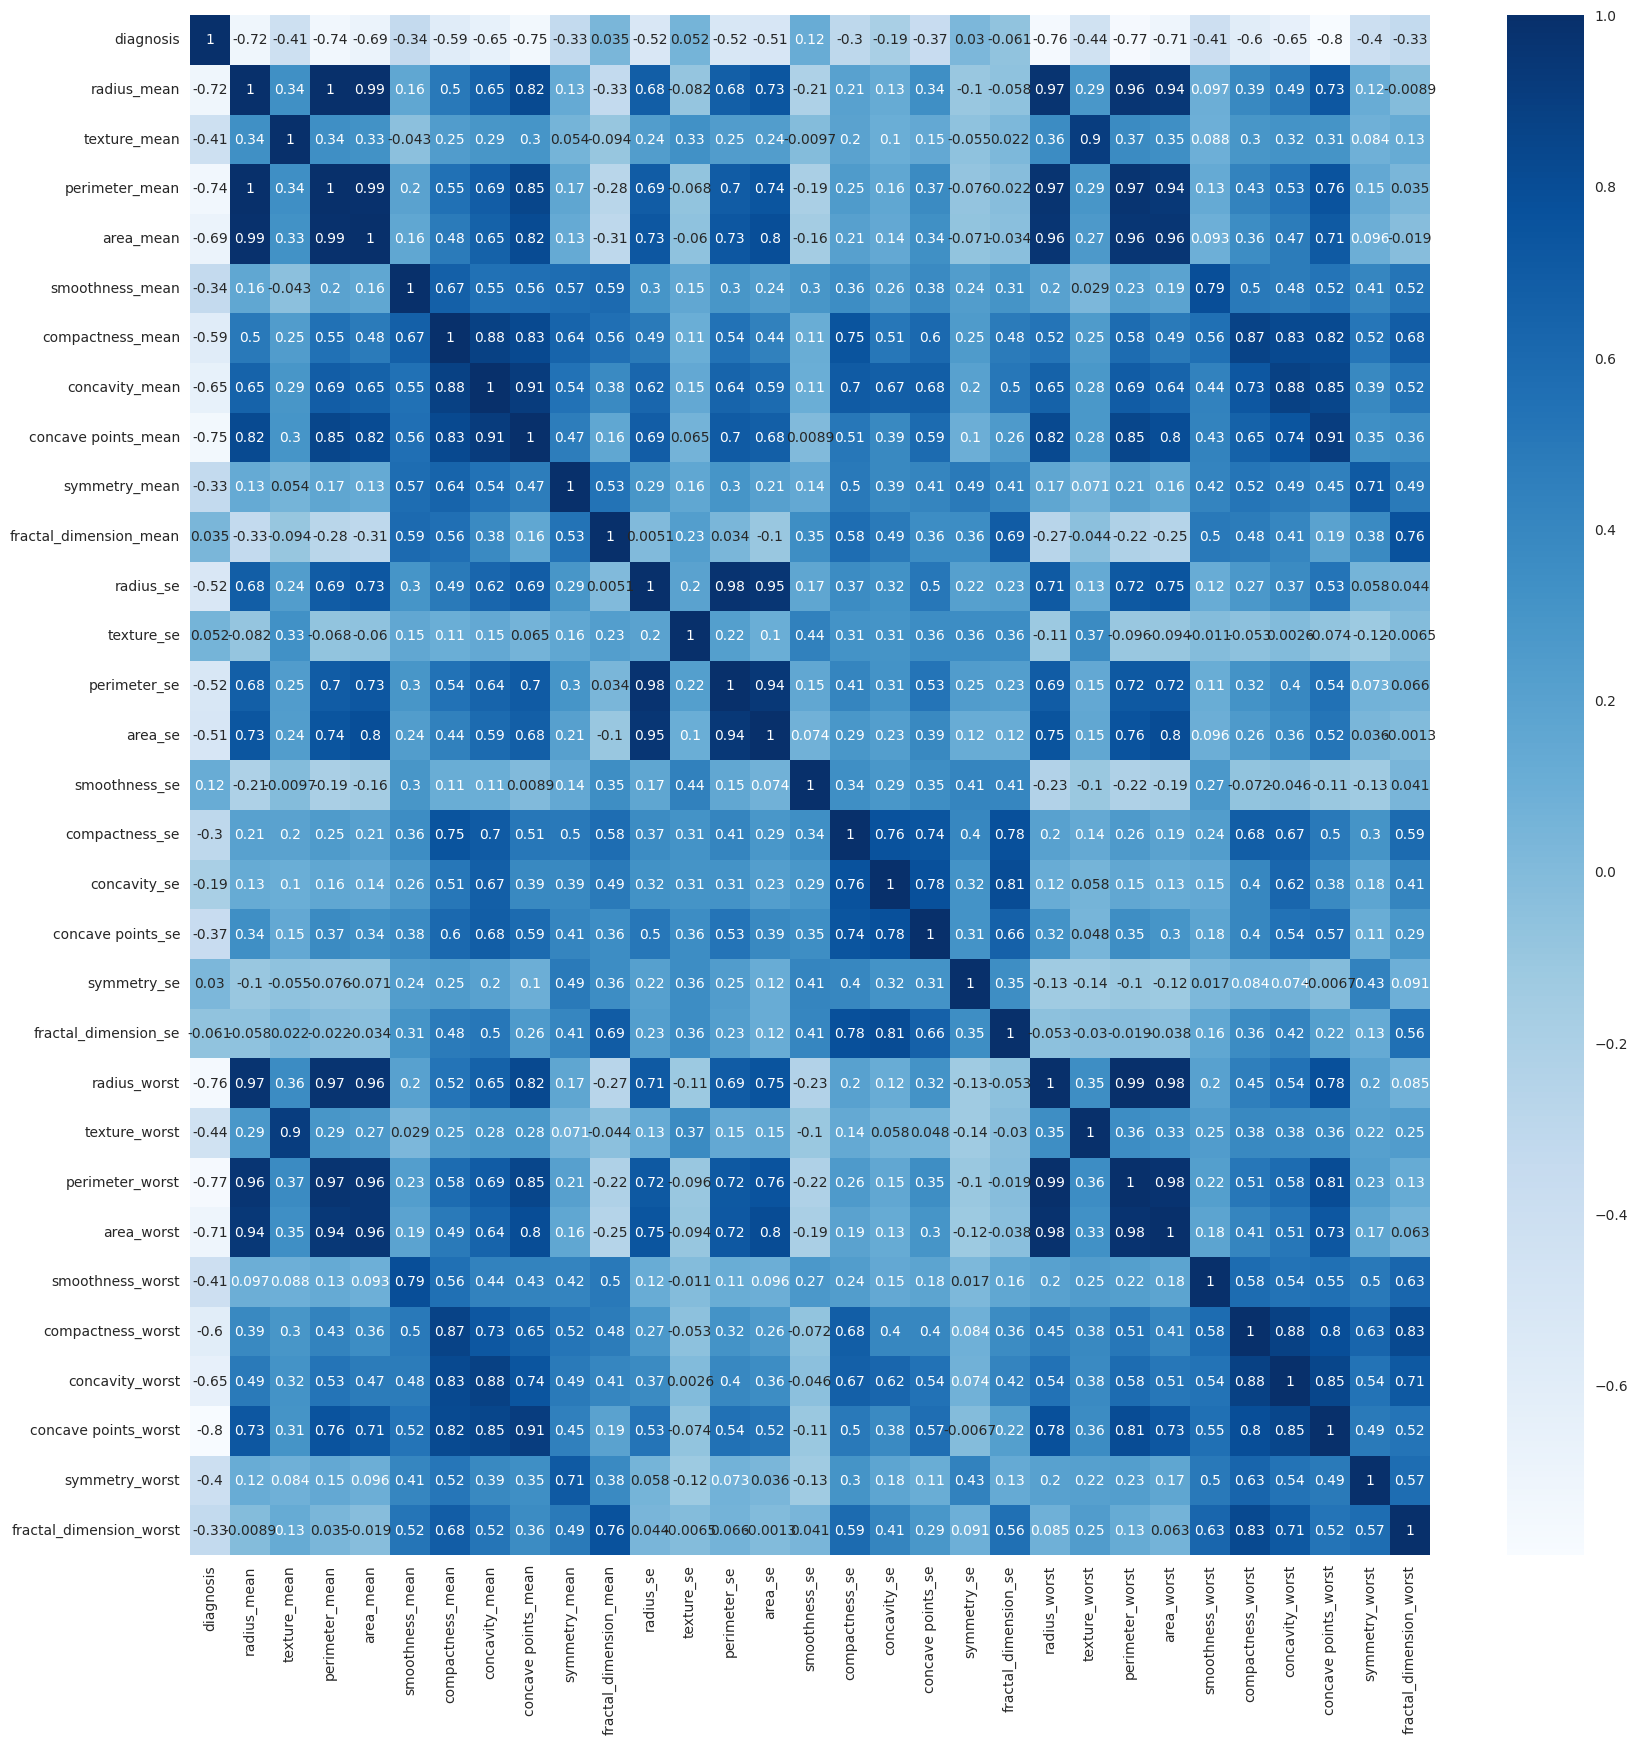

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),cbar=True,annot=True,cmap='Blues')
plt.show()

In [ ]:
X=dataset.drop('symmetry_se',axis=1)

In [ ]:
X=dataset.drop('smoothness_se',axis=1)

# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train= scaler.transform(X_train)

In [ ]:
X_test= scaler.transform(X_test)

In [ ]:
Y_train

227    1
104    1
248    1
356    1
90     1
      ..
479    0
509    0
120    1
235    1
161    0
Name: diagnosis, Length: 398, dtype: int64

In [ ]:


from sklearn.preprocessing import StandardScaler
std=StandardScaler()


X_train= std.fit_transform(X_train)
X_test= std.transform(X_test)


#X_train_std



# Decision Tree

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='entropy',random_state=1)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

### RANDOM FOREST CLASSIFICATION

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
Y_predict_decision=dt.predict(X_test)

In [ ]:

from sklearn.metrics import accuracy_score
dt_ac=accuracy_score(Y_test,Y_predict_decision)

accuracy['decision_tree']=dt_ac

In [ ]:
dt_ac

0.9239766081871345

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
#LogisticRegression()
Y_prediction_logistic_regression=lr.predict(X_test)
logisticregression_accuracy=accuracy_score(Y_test,Y_prediction_logistic_regression)
logisticregression_accuracy

0.9590643274853801

In [ ]:
accuracy['logistic regression']=logisticregression_accuracy

# Support Vector Classifier

# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
classifier = SVC(random_state=100)
predictor_svc = classifier.fit(X_train, Y_train)
y_pred_svc = predictor_svc.predict(X_test)
accuracy_svc = accuracy_score(Y_test, y_pred_svc)
accuracy_svc

0.9766081871345029

In [ ]:
accuracy['support vector']=accuracy_svc

### NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

# XGBOOST

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(random_state=1000, eval_metric='logloss')
predictor_xgb = classifier.fit(X_train, Y_train)
y_pred_xgboost = predictor_xgb.predict(X_test)
accuracy_xgb = accuracy_score(Y_test, y_pred_xgboost)
accuracy_xgb

0.9590643274853801

In [ ]:
accuracy['xgboost']=accuracy_xgb

# Accuracy

# Decision Tree

In [ ]:
from sklearn.metrics import f1_score
f1dt= f1_score(Y_test,Y_predict_decision)
f1dt


0.9411764705882353

[[ 54   3]
 [ 10 104]]


<Axes: >

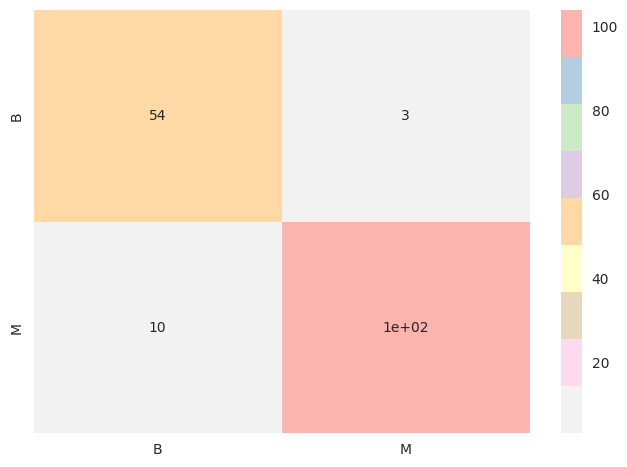

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(Y_predict_decision, Y_test)
print(mat)
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['B' ,'M'], yticklabels=['B' ,'M'], annot=True)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
pr_dt= precision_score(Y_test,Y_predict_decision)
print('Precision: %.3f' % precision_score(Y_test,Y_predict_decision))

Precision: 0.912


In [ ]:
rc_dt= recall_score(Y_test,Y_predict_decision)
print('Recall: %.3f' % recall_score(Y_test,Y_predict_decision))

Recall: 0.972


In [ ]:
ac_dt= accuracy_score(Y_test,Y_predict_decision)
print('Accuracy: %.3f' % accuracy_score(Y_test,Y_predict_decision))

Accuracy: 0.924


### RANDOM FOREST CLASSIFICATION

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_rfc = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_rfc)
print(cm)
accuracy_score(Y_test, y_pred_rfc)

[[ 60   4]
 [  3 104]]


0.9590643274853801

In [ ]:
from sklearn.metrics import f1_score
f1rf= f1_score(Y_test,y_pred_rfc)
f1rf

0.9674418604651163

[[ 60   3]
 [  4 104]]


<Axes: >

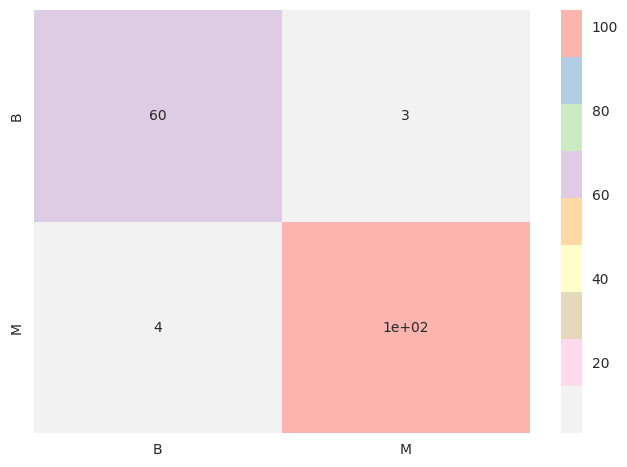

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_pred_rfc, Y_test)
print(mat)
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['B' ,'M'], yticklabels=['B' ,'M'], annot=True)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
pr_rfc= precision_score(Y_test,y_pred_rfc)
print('Precision: %.3f' % precision_score(Y_test,y_pred_rfc))

Precision: 0.963


In [ ]:
rc_rfc= recall_score(Y_test,y_pred_rfc)
print('Recall: %.3f' % recall_score(Y_test,y_pred_rfc))

Recall: 0.972


In [ ]:
ac_rfc= accuracy_score(Y_test, y_pred_rfc)
print('Accuracy: %.3f' % accuracy_score(Y_test, y_pred_rfc))


Accuracy: 0.959


### KNN



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_knn = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_knn)
print(cm)
accuracy_score(Y_test, y_pred_knn)

[[ 60   4]
 [  3 104]]


0.9590643274853801

In [ ]:
from sklearn.metrics import f1_score
f1knn= f1_score(Y_test,y_pred_knn)
f1knn


0.9674418604651163

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
pr_knn= precision_score(Y_test,y_pred_knn)
print('Precision: %.3f' % precision_score(Y_test,y_pred_knn))

Precision: 0.963


In [ ]:
rc_knn= recall_score(Y_test,y_pred_knn)
print('Recall: %.3f' % recall_score(Y_test,y_pred_knn))

Recall: 0.972


In [ ]:
ac_knn= accuracy_score(Y_test, y_pred_knn)
print('Accuracy: %.3f' % accuracy_score(Y_test, y_pred_knn))

Accuracy: 0.959


[[ 60   3]
 [  4 104]]


<Axes: >

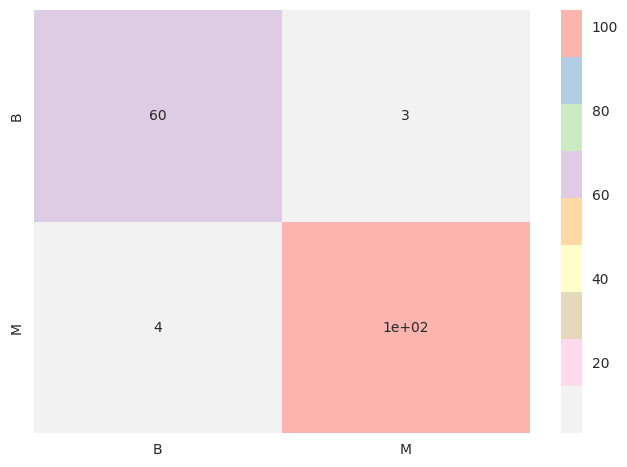

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_pred_knn, Y_test)
print(mat)
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['B' ,'M'], yticklabels=['B' ,'M'], annot=True)

### Naive Bayes

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_naivebayes = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_naivebayes)
print(cm)
accuracy_score(Y_test, y_pred_naivebayes)

[[ 60   4]
 [  3 104]]


0.9590643274853801

In [ ]:
from sklearn.metrics import f1_score
f1nb= f1_score(Y_test,y_pred_naivebayes)
f1nb

0.9674418604651163

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
pr_nb= precision_score(Y_test,y_pred_naivebayes)
print('Precision: %.3f' % precision_score(Y_test,y_pred_naivebayes))

Precision: 0.963


In [ ]:
rc_nb= recall_score(Y_test,y_pred_naivebayes)
print('Recall: %.3f' % recall_score(Y_test,y_pred_naivebayes))

Recall: 0.972


In [ ]:
ac_nb= accuracy_score(Y_test, y_pred_naivebayes)
print('Accuracy: %.3f' % accuracy_score(Y_test, y_pred_naivebayes))

Accuracy: 0.959


[[ 60   3]
 [  4 104]]


<Axes: >

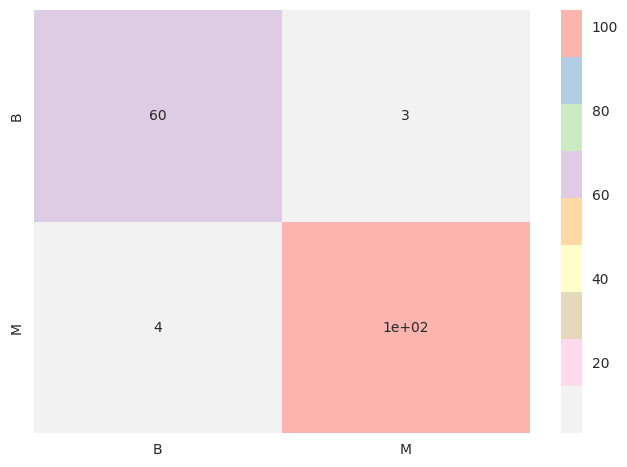

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_pred_naivebayes, Y_test)
print(mat)
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['B' ,'M'], yticklabels=['B' ,'M'], annot=True)

# Logistics Regression

In [ ]:
from sklearn.metrics import f1_score
f1lr = f1_score(Y_test,Y_prediction_logistic_regression)
f1lr

0.967741935483871

[[ 59   2]
 [  5 105]]


<Axes: >

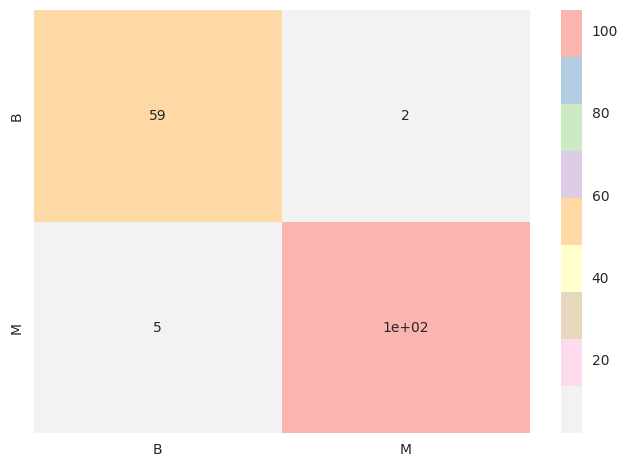

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(Y_prediction_logistic_regression, Y_test)
print(mat)
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['B' ,'M'], yticklabels=['B' ,'M'], annot=True)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
pr_lr= precision_score(Y_test,Y_prediction_logistic_regression)
print('Precision: %.3f' % precision_score(Y_test,Y_prediction_logistic_regression))

Precision: 0.955


In [ ]:
rc_lr= recall_score(Y_test,Y_prediction_logistic_regression)
print('Recall: %.3f' % recall_score(Y_test,Y_prediction_logistic_regression))

Recall: 0.981


In [ ]:
ac_lr= accuracy_score(Y_test, Y_prediction_logistic_regression)
print('Accuracy: %.3f' % accuracy_score(Y_test, Y_prediction_logistic_regression))

Accuracy: 0.959


# Support Vector Classifier



In [ ]:
from sklearn.metrics import f1_score
f1sv = f1_score(Y_test,y_pred_svc)
f1sv

0.9816513761467891

[[ 60   0]
 [  4 107]]


<Axes: >

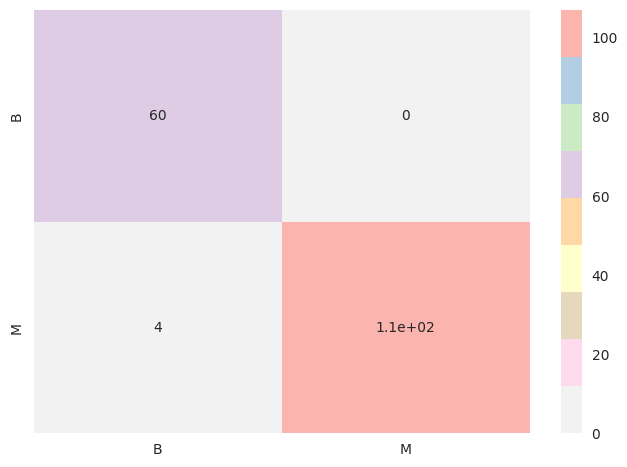

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_pred_svc, Y_test)
print(mat)
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['B' ,'M'], yticklabels=['B' ,'M'], annot=True)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
pr_sv= precision_score(Y_test,y_pred_svc)
print('Precision: %.3f' % precision_score(Y_test,y_pred_svc))

Precision: 0.964


In [ ]:
rc_sv= recall_score(Y_test,y_pred_svc)
print('Recall: %.3f' % recall_score(Y_test,y_pred_svc))

Recall: 1.000


In [ ]:
ac_sv= accuracy_score(Y_test,y_pred_svc)
print('Accuracy: %.3f' % accuracy_score(Y_test,y_pred_svc))

Accuracy: 0.977


# XGBOOST

In [ ]:
from sklearn.metrics import f1_score
f1xg = f1_score(Y_test,y_pred_xgboost)
f1xg

0.9674418604651163

[[ 60   3]
 [  4 104]]


<Axes: >

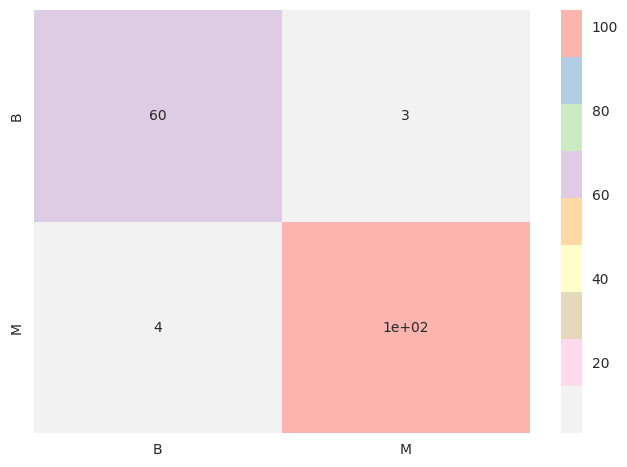

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_pred_xgboost, Y_test)
print(mat)
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['B' ,'M'], yticklabels=['B' ,'M'], annot=True)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
pr_xg= precision_score(Y_test,y_pred_xgboost)
print('Precision: %.3f' % precision_score(Y_test,y_pred_xgboost))

Precision: 0.963


In [ ]:
rc_xg= recall_score(Y_test,y_pred_xgboost)
print('Recall: %.3f' % recall_score(Y_test,y_pred_xgboost))

Recall: 0.972


In [ ]:
ac_xg= accuracy_score(Y_test,y_pred_xgboost)
print('Accuracy: %.3f' % accuracy_score(Y_test,y_pred_xgboost))

Accuracy: 0.959


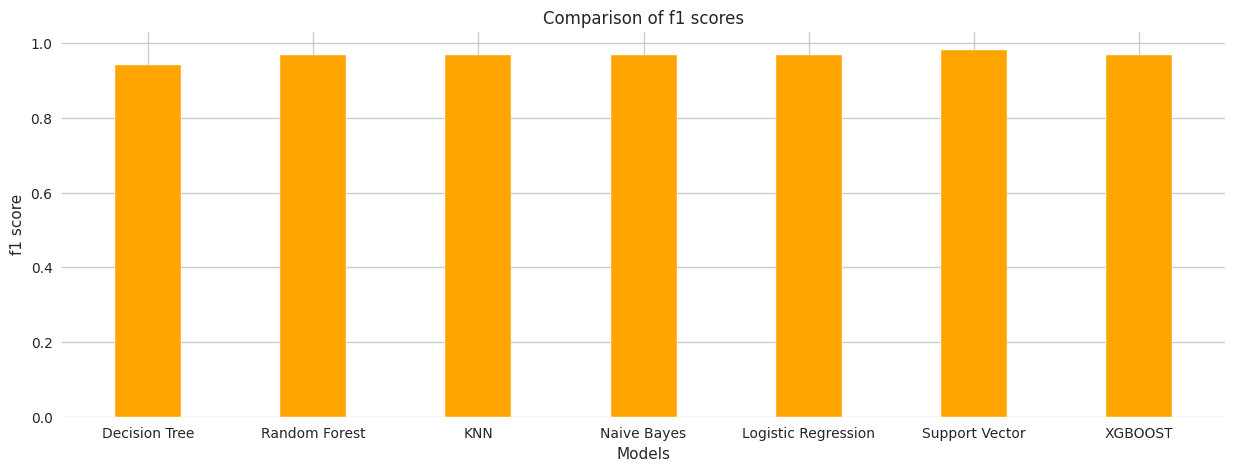

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Decision Tree':f1dt, 'Random Forest':f1rf, 'KNN':f1knn, 'Naive Bayes':f1nb, 'Logistic Regression':f1lr,'Support Vector':f1sv, 'XGBOOST':f1xg}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (15, 5))

# creating the bar plot
plt.bar(courses, values, color ='orange',
        width = 0.4)

plt.xlabel("Models")
plt.ylabel("f1 score")
plt.title("Comparison of f1 scores")
plt.show()

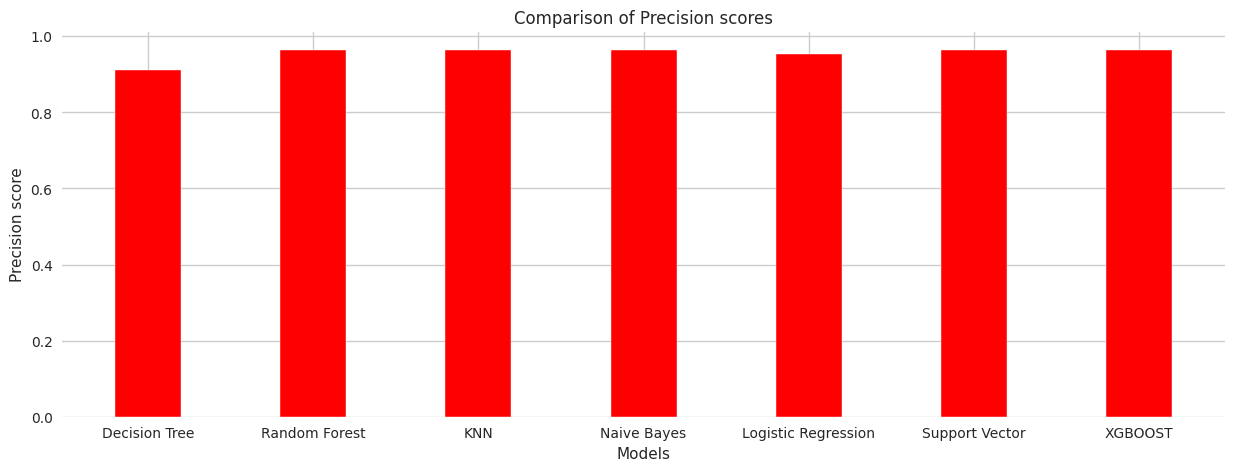

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Decision Tree':pr_dt, 'Random Forest':pr_rfc, 'KNN':pr_knn, 'Naive Bayes':pr_nb, 'Logistic Regression':pr_lr,'Support Vector':pr_sv, 'XGBOOST':pr_xg}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (15, 5))

# creating the bar plot
plt.bar(courses, values, color ='red',
        width = 0.4)

plt.xlabel("Models")
plt.ylabel("Precision score")
plt.title("Comparison of Precision scores")
plt.show()

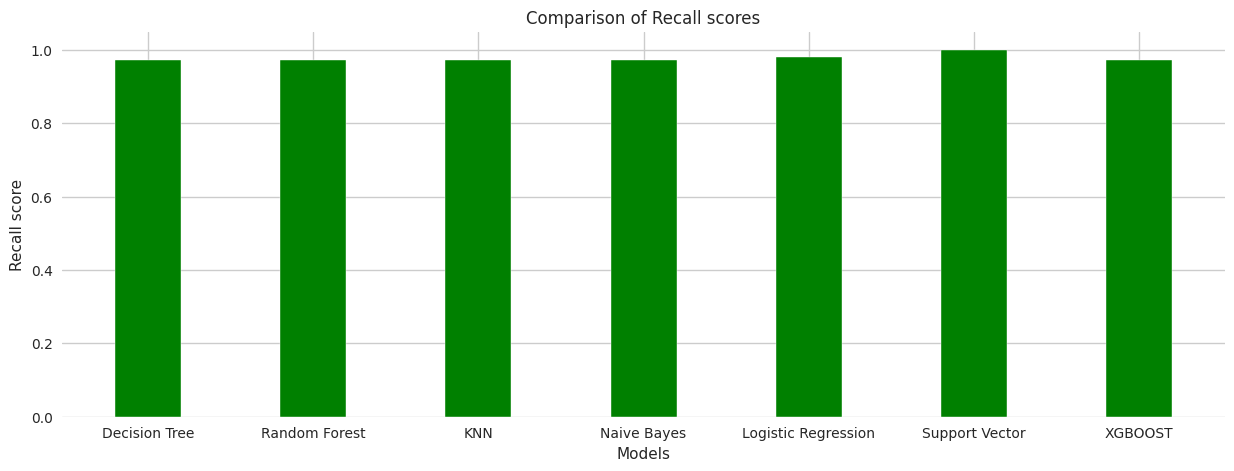

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Decision Tree':rc_dt, 'Random Forest':rc_rfc, 'KNN':rc_knn, 'Naive Bayes':rc_nb, 'Logistic Regression':rc_lr,'Support Vector':rc_sv, 'XGBOOST':rc_xg}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (15, 5))

# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)

plt.xlabel("Models")
plt.ylabel("Recall score")
plt.title("Comparison of Recall scores")
plt.show()

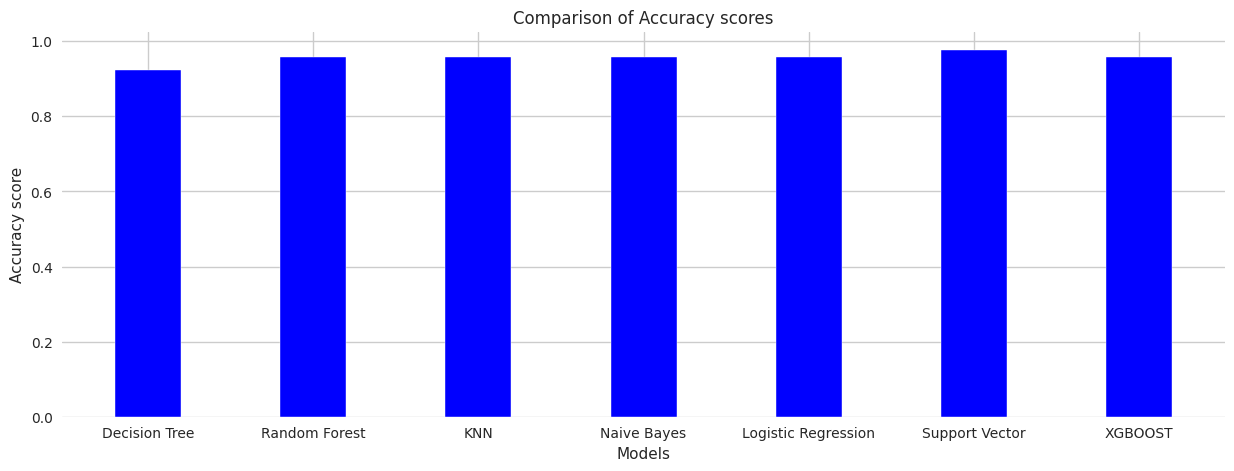

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Decision Tree':ac_dt, 'Random Forest':ac_rfc, 'KNN':ac_knn, 'Naive Bayes':ac_nb, 'Logistic Regression':ac_lr,'Support Vector':ac_sv, 'XGBOOST':ac_xg}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (15, 5))

# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)

plt.xlabel("Models")
plt.ylabel("Accuracy score")
plt.title("Comparison of Accuracy scores")
plt.show()